In [1]:
pip install piexif

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\mmsub\Anaconda3\envs\learn-env\python.exe -m pip install --upgrade pip' command.


In [3]:
from matplotlib import pyplot as plt
import os
import random

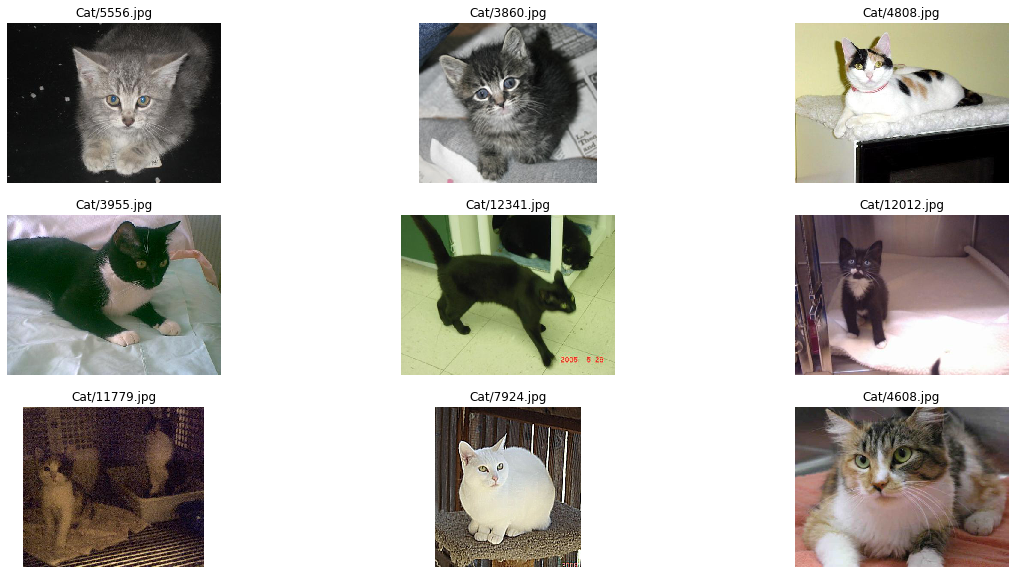

In [9]:
# Get list of file names
_, _, cat_images = next(os.walk('Dataset/PetImages/Cat'))

fig, ax = plt.subplots(3,3,figsize=(20,10))

for idx, img in enumerate(random.sample(cat_images,9)):
    img_read = plt.imread('Dataset/PetImages/Cat/'+img)
    ax[int(idx/3),idx%3].imshow(img_read)
    ax[int(idx/3),idx%3].axis('off')
    ax[int(idx/3),idx%3].set_title('Cat/'+img)
plt.show()

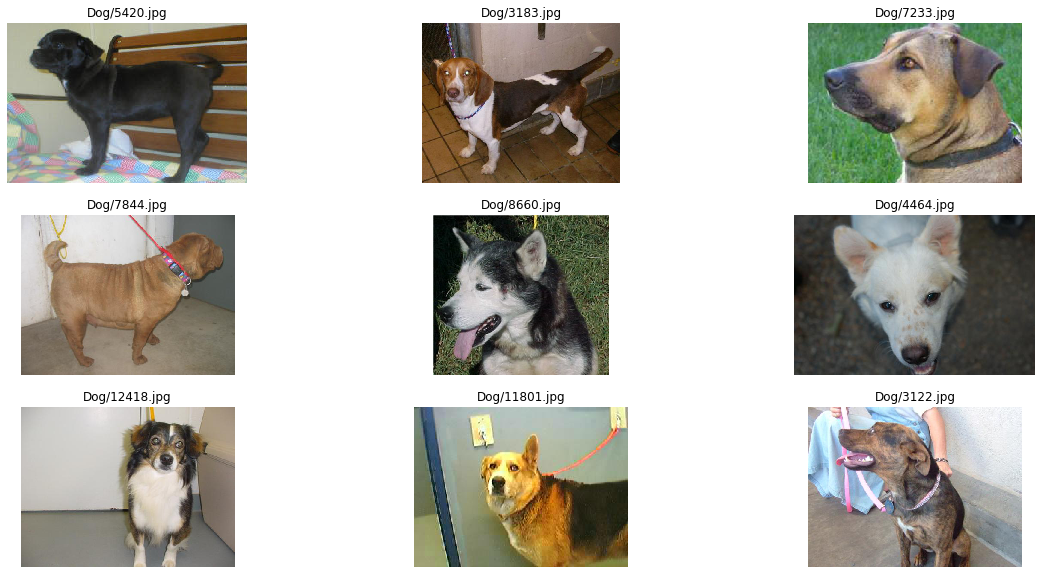

In [10]:
# Get list of file names
_, _, dog_images = next(os.walk('Dataset/PetImages/Cat'))

fig, ax = plt.subplots(3,3,figsize=(20,10))

for idx, img in enumerate(random.sample(dog_images,9)):
    img_read = plt.imread('Dataset/PetImages/Dog/'+img)
    ax[int(idx/3),idx%3].imshow(img_read)
    ax[int(idx/3),idx%3].axis('off')
    ax[int(idx/3),idx%3].set_title('Dog/'+img)
plt.show()

In [12]:
from utils import train_test_split

src_folder = 'Dataset/PetImages/'
train_test_split(src_folder)

In [14]:
from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(rotation_range = 30,
                                    width_shift_range = 0.2,
                                    height_shift_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True,
                                    fill_mode = 'nearest')

Using TensorFlow backend.
C:\Users\mmsub\Anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\mmsub\Anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\mmsub\Anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\mmsub\Anaconda3\envs\learn

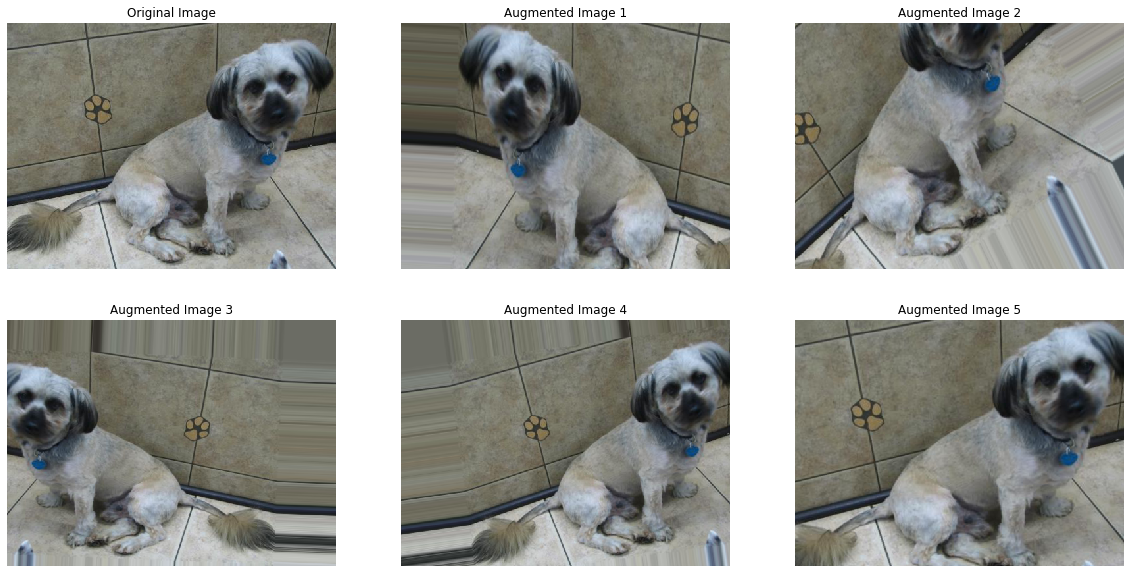

In [17]:
fig, ax = plt.subplots(2,3,figsize=(20,10))
all_images = []

_, _, dog_images = next(os.walk('Dataset/PetImages/Train/Dog/'))
random_img = random.sample(dog_images,1)[0]
random_img = plt.imread('Dataset/PetImages/Train/Dog/'+random_img)
all_images.append(random_img)

random_img = random_img.reshape((1,)+random_img.shape)
sample_augmented_images = image_generator.flow(random_img)

for _ in range(5):
    augmented_imgs = sample_augmented_images.next()
    for img in augmented_imgs:
        all_images.append(img.astype('uint8'))

for idx, img in enumerate(all_images):
    ax[int(idx/3),idx%3].imshow(img)
    ax[int(idx/3),idx%3].axis('off')
    if idx == 0:
        ax[int(idx/3), idx%3].set_title('Original Image')
    else: 
        ax[int(idx/3), idx%3].set_title('Augmented Image {}'.format(idx))

plt.show()

In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

model = Sequential()

In [47]:
FILTER_SIZE = 3
NUM_FILTERS = 32
INPUT_SIZE = 32
MAXPOOL_SIZE = 2
BATCH_SIZE = 16
STEPS_PER_EPOCH = 20000//BATCH_SIZE
EPOCHS = 10

In [21]:
model.add(Conv2D(NUM_FILTERS,(FILTER_SIZE,FILTER_SIZE), input_shape = (INPUT_SIZE,INPUT_SIZE,3), activation = 'relu'))

Instructions for updating:
Colocations handled automatically by placer.


In [22]:
model.add(MaxPooling2D(pool_size = (MAXPOOL_SIZE,MAXPOOL_SIZE)))

In [23]:
model.add(Conv2D(NUM_FILTERS,(FILTER_SIZE,FILTER_SIZE), input_shape = (INPUT_SIZE,INPUT_SIZE,3), activation = 'relu'))

In [24]:
model.add(MaxPooling2D(pool_size = (MAXPOOL_SIZE,MAXPOOL_SIZE)))

In [25]:
model.add(Flatten())

In [26]:
model.add(Dense(units=128,activation ='relu'))

In [27]:
model.add(Dropout(0.5))

In [28]:
model.add(Dense(units=1,activation = 'sigmoid'))

In [29]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics=['accuracy'])

In [30]:
training_data_generator = ImageDataGenerator(rescale = 1./255)

training_set = training_data_generator.flow_from_directory('Dataset/PetImages/Train', target_size = (INPUT_SIZE,INPUT_SIZE),
                                                          batch_size = BATCH_SIZE,class_mode='binary')
model.fit_generator(training_set,steps_per_epoch = STEPS_PER_EPOCH, epochs = EPOCHS, verbose = 1)

Found 19997 images belonging to 2 classes.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
1250/1250 [==============================] - 80s 64ms/step - loss: 0.6250 - accuracy: 0.6488
Epoch 2/10
1250/1250 [==============================] - 76s 61ms/step - loss: 0.5393 - accuracy: 0.7292
Epoch 3/10
1250/1250 [==============================] - 80s 64ms/step - loss: 0.4925 - accuracy: 0.7648
Epoch 4/10
1250/1250 [==============================] - 84s 67ms/step - loss: 0.4660 - accuracy: 0.7787
Epoch 5/10
1250/1250 [==============================] - 76s 61ms/step - loss: 0.4353 - accuracy: 0.7956
Epoch 6/10
1250/1250 [==============================] - 76s 61ms/step - loss: 0.4123 - accuracy: 0.8112
Epoch 7/10
1250/1250 [==============================] - 86s 69ms/step - loss: 0.3876 - accuracy: 0.8257
Epoch 8/10
1250/1250 [==============================] - 84s 67ms/step - loss: 0.3650 - accuracy: 0.8354
Epoch 9/10
1250/1250 [==============================] - 76s 61ms/step - loss:

In [33]:
testing_data_generator = ImageDataGenerator(rescale = 1./255)

test_set = testing_data_generator.flow_from_directory('Dataset/PetImages/Test/', target_size = (INPUT_SIZE,INPUT_SIZE),
                                                     batch_size =BATCH_SIZE, class_mode = 'binary')
score = model.evaluate_generator(test_set,steps =len(test_set))
for idx, metric in enumerate(model.metrics_names):
    print("{}: {}".format(metric,score[idx]))

Found 5000 images belonging to 2 classes.
loss: 0.4586998224258423
accuracy: 0.7900000214576721


In [34]:
from keras.applications.vgg16 import VGG16

In [71]:
INPUT_SIZE = 128
vgg16 = VGG16(include_top = False, weights = 'imagenet',input_shape=(INPUT_SIZE,INPUT_SIZE,3))

In [72]:
for layer in vgg16.layers:
    layer.trainable=False

In [73]:
from keras.models import Model

input_ = vgg16.input
output_=vgg16(input_)
last_layer = Flatten(name='flatten')(output_)
last_layer = Dense(1,activation ='sigmoid')(last_layer)
model = Model(input=input_, output = last_layer)

C:\Users\mmsub\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  import sys


In [74]:
BATCH_SIZE = 16
STEPS_PER_EPOCH = 200
EPOCHS = 3

In [75]:
model.compile(optimizer ='adam',loss = 'binary_crossentropy',metrics=['accuracy'])

In [77]:
training_data_generator = ImageDataGenerator(rescale = 1./255)
testing_data_generator = ImageDataGenerator(rescale = 1./255)

training_set = training_data_generator.flow_from_directory('Dataset/PetImages/Train/', target_size=(INPUT_SIZE,INPUT_SIZE),
                                                           batch_size = BATCH_SIZE, class_mode = 'binary')
test_set = testing_data_generator.flow_from_directory('Dataset/PetImages/Test/',
                                             target_size = (INPUT_SIZE, INPUT_SIZE),
                                             batch_size = BATCH_SIZE,
                                             class_mode = 'binary')
model.fit_generator(training_set, steps_per_epoch = STEPS_PER_EPOCH, epochs = EPOCHS, verbose =1)

Found 19997 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Epoch 1/3
200/200 [==============================] - 560s 3s/step - loss: 0.4012 - accuracy: 0.8041
Epoch 2/3
200/200 [==============================] - 575s 3s/step - loss: 0.2994 - accuracy: 0.8711
Epoch 3/3
200/200 [==============================] - 488s 2s/step - loss: 0.2669 - accuracy: 0.8894


In [78]:
score = model.evaluate_generator(test_set,len(test_set))

for idx, metric in enumerate(model.metrics_names):
    print("{}: {}".format(metric,score[idx]))

loss: 0.6551424264907837
accuracy: 0.8781999945640564


In [79]:
test_set = testing_data_generator.flow_from_directory('Dataset/PetImages/Test/',
                                             target_size = (INPUT_SIZE, INPUT_SIZE),
                                             batch_size = 1,
                                             class_mode = 'binary')

Found 5000 images belonging to 2 classes.


In [80]:
strongly_wrong_idx=[]
strongly_right_idx=[]
weakly_wrong_idx=[]

In [84]:
for i in range(test_set.__len__()):
    img = test_set.__getitem__(i)[0]
    pred_prob = model.predict(img)[0][0]
    pred_label = int(pred_prob > 0.5)
    actual_label = int(test_set.__getitem__(i)[1][0])
    if pred_label != actual_label and (pred_prob >0.8 or pred_prob<0.2): strongly_wrong_idx.append(i)
    elif pred_label != actual_label and (pred_prob >0.4 and pred_prob<0.6): weakly_wrong_idx.append(i)
    elif pred_label == actual_label and (pred_prob>0.8 or pred_prob<0.2): strongly_right_idx.append(i)
    if (len(strongly_wrong_idx)>=9 and len(strongly_right_idx)>=9 and len(weakly_wrong_idx)>=9 and 
        len(weakly_wrong_idx)>=9):break

In [90]:
def plot_on_grid(test_set,idx_to_plot,img_size=INPUT_SIZE):
    fig, ax = plt.subplots(3,3,figsize=(20,10))
    for i, idx in enumerate(random.sample(idx_to_plot,9)):
        img = test_set.__getitem__(idx)[0].reshape(img_size,img_size,3)
        ax[int(i/3), i%3].imshow(img)
        ax[int(i/3), i%3].axis('off')

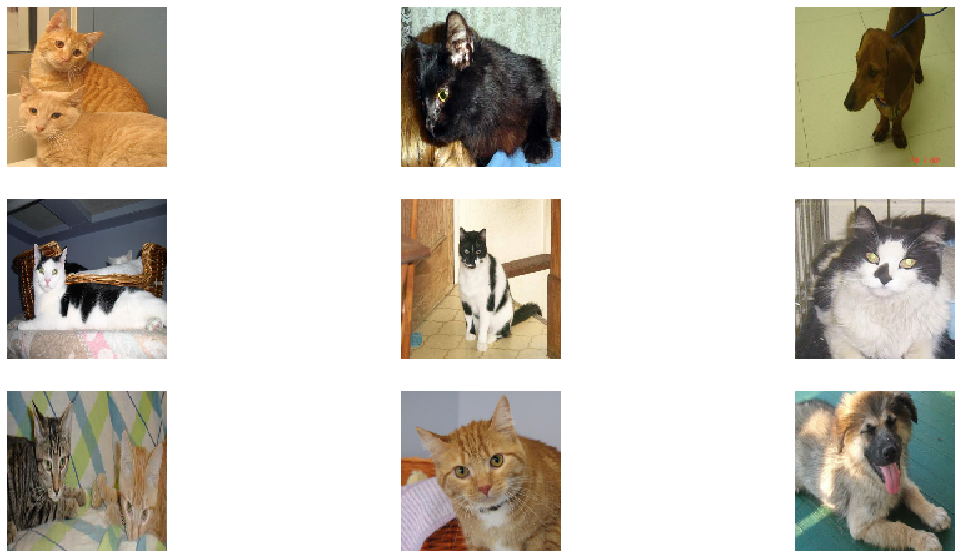

In [91]:
plot_on_grid(test_set,strongly_right_idx)

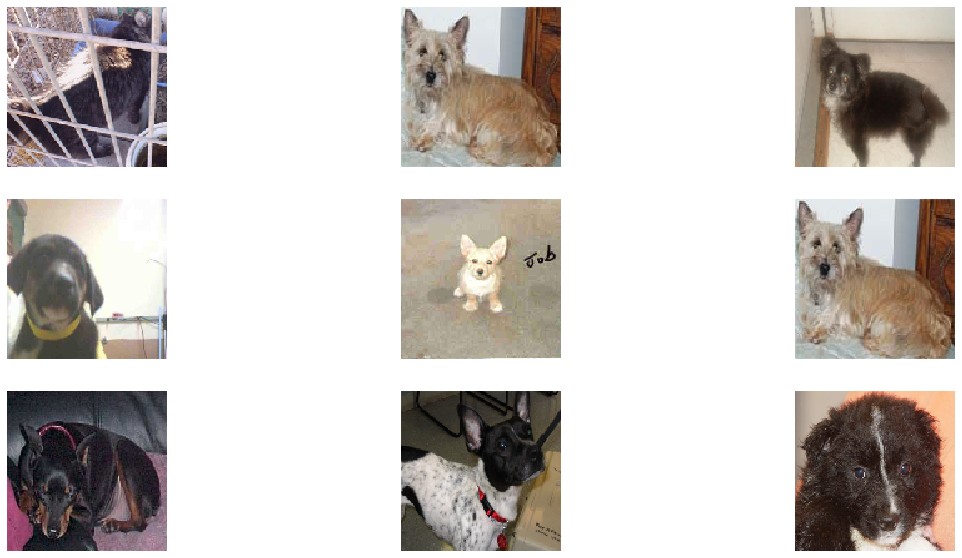

In [92]:
plot_on_grid(test_set,strongly_wrong_idx)

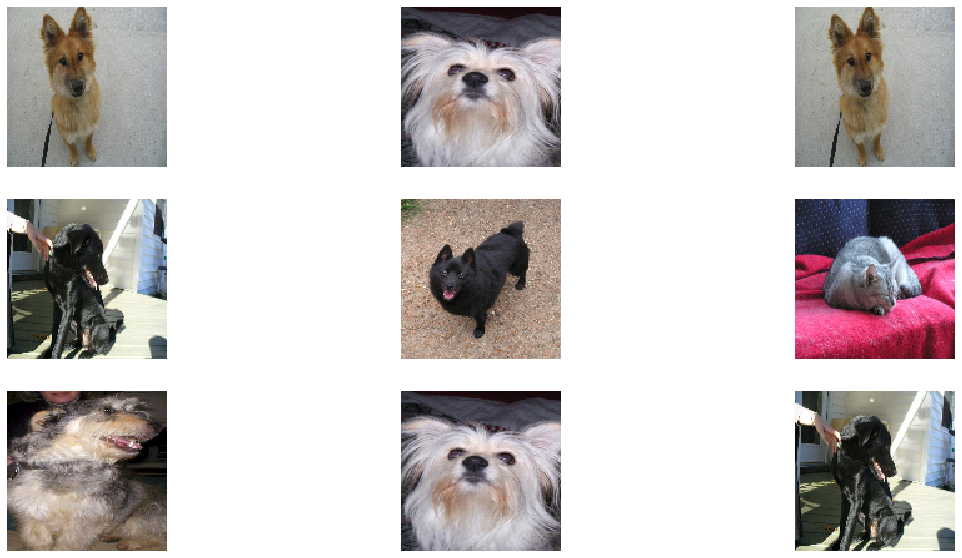

In [93]:
plot_on_grid(test_set,weakly_wrong_idx)